In [ ]:
EMPLOYEE ATTRITION PROBLEM MODELING AND EVALUATING

JAVIER ALFREDO BRAVO BERNAL
TECNOLOGICO DE MONTERREY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

#Análisis descriptivo y preprocesamiento de los datos:






Employee attrition problem es basicamente un indicador de recursos humanos en el cual se mide la rotación del personal de una empresa, si este es muy alto la empresa puede perder su imagen y supone también altos costos de capacitación al nuevo personal, este análisis permite evaluar y ubicar dentro de la empresa empleados que posiblemente no tengan un interés en permanecer o no tengan un desempeño acorde a la empresa.



In [ ]:
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Inteligencia Artificial y aprendizaje automatico/Actividad3/"
os.chdir(DIR)

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
num_variable= df.select_dtypes(include=[np.int64])
num_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [ ]:
num_variable.nunique()


Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64



*   En un primer analisis tenemos 26 variables numéricas: Age,DistanceFromhome,Education, EmployeeCount,EmployeeNumber,EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears,TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.


* Todas las variables son de valor entero int64.   


* No tiene variables flotantes

* En primera estancia se podrían eliminar las variables: Employeecount, standardHours ya que tienen un solo valor unico lo que significa que todas las filas tienen el mismo valor.

In [ ]:
cat_variable= df.select_dtypes(include='object')
cat_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


* Tenemos 9 variables categoricas:

 0 Attrition       
 1   BusinessTravel  
 2   Department      
 3   EducationField  
 4   Gender          
 5   JobRole         
 6   MaritalStatus   
 7   Over18          
 8   OverTime        

In [ ]:
cat_variable.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

* Tenemos tres variables binarias:

Attrition         2

Gender            2

OverTime          2

In [ ]:
for col in cat_variable : print(cat_variable[col].value_counts().T, "\n\n")


No     1233
Yes     237
Name: Attrition, dtype: int64 


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 


Male      882
Female    588
Name: Gender, dtype: int64 


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 


Y    1470
Name: Over18, dtype: int64 


No     105

las variables nominales y sus niveles :

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150

Name: BusinessTravel, dtype: int64
************
Research & Development    961
Sales                     446
Human Resources            63

Name: Department, dtype: int64
**************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27

Name: EducationField, dtype: int64
*************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52

Name: JobRole, dtype: int64
**************
Married     673
Single      470
Divorced    327

Name: MaritalStatus, dtype: int64
***************


* Tenemos las siguientes variables ordinales que en el dataset nos indican que estan con valores numericos los cuales corresponden a ciertos niveles:

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'


EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'


RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

* Se pueden eliminar 1 variable categorica:

Y    1470

Name: Over18, dtype: int64

ya que solo tiene un valor


**Las variables expuestas anteriormente numéricas, dado el data set 7 variables fueron expresadas de manera numérica y se explica en el dataset que son categóricas pero fueron previamente clasificadas según su nivel lo cual es útil mantenerlo ya que respeta una jerarquía expuesta por el dataset. **

Elimino variables que no aportan

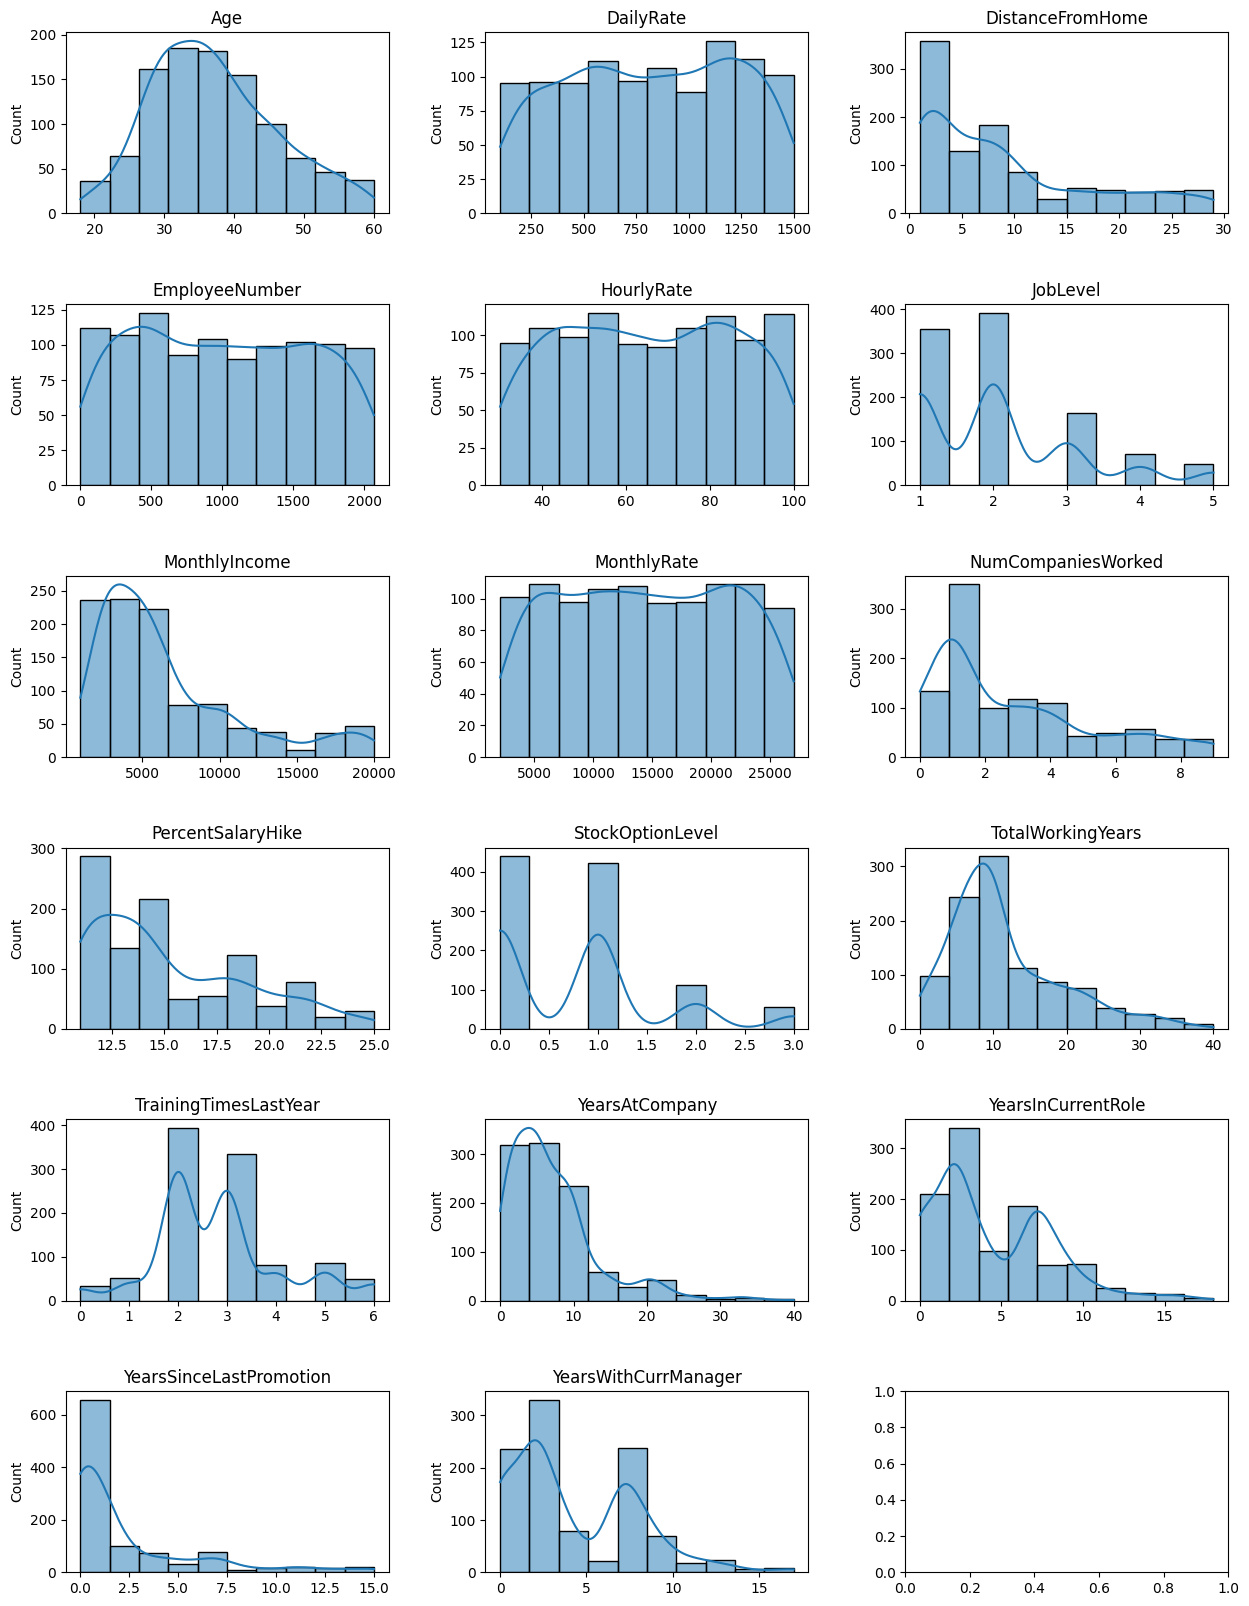

In [ ]:
Xtrain_numerical = X_train.select_dtypes(include='number')
cat_num=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
Xtrain_numerical = Xtrain_numerical.drop(columns=cat_num,axis=1)
fig, axes = plt.subplots(6,3, figsize=(15,20))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
axes = axes.ravel()
for col, ax in zip(Xtrain_numerical, axes):
  sns.histplot(x=Xtrain_numerical[col], ax=ax,bins=10, kde=True) # ---> Seaborn
  df_mean=Xtrain_numerical[col].mean()
  df_median= Xtrain_numerical[col].median()
  ax.set(title=f'{col}',xlabel=None)

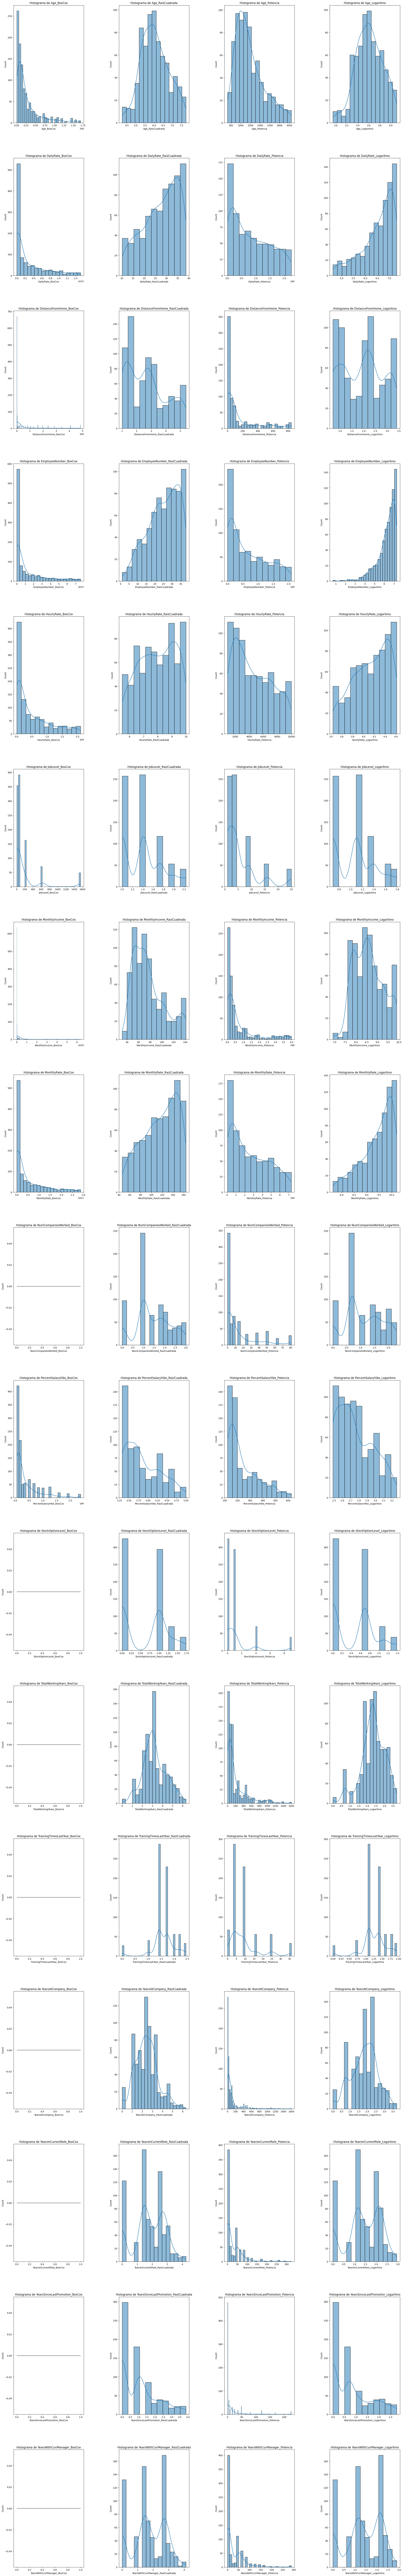

In [ ]:
lambda_value_boxcox = 5
lambda_value_log = 0.1

# Aplicar transformaciones
df_transformed = pd.DataFrame()
for col in Xtrain_numerical.columns:
    # Transformación Box-Cox
    if (Xtrain_numerical[col] > 0).all():  # Verificar que no haya ceros o valores negativos
        transformed_data_boxcox = boxcox(Xtrain_numerical[col] + 1, lmbda=lambda_value_boxcox)
        df_transformed[f'{col}_BoxCox'] = transformed_data_boxcox
    else:
        df_transformed[f'{col}_BoxCox'] = np.nan

    # Transformación Raíz Cuadrada
    df_transformed[f'{col}_RaizCuadrada'] = np.sqrt(Xtrain_numerical[col])

    # Transformación Potencia
    df_transformed[f'{col}_Potencia'] = np.power(Xtrain_numerical[col], 2)

    # Transformación Logaritmo
    df_transformed[f'{col}_Logaritmo'] = np.log(Xtrain_numerical[col] + 1)

# Graficar histogramas de cada transformación
num_plots = len(df_transformed.columns)
num_cols = 4  # Cambiar a 3 columnas para acomodar los 5 subgráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular el número de filas necesario
plt.figure(figsize=(30, 200))
plt.subplots_adjust(wspace=0.5,hspace=0.3)
for i, col in enumerate(df_transformed.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df_transformed[col], kde=True)
    plt.title(f'Histograma de {col}')
plt.show()

DADOS LOS DIFERENTES GRAFICOS Y TRANSFORMACIONES ELEGI UTILIZAR UN ESCALADOR MINMAX Y UNA TRANSFORMACION TIPO RAIZ CUADRADA

In [ ]:
scaler = MinMaxScaler()
X_trainT = X_train.copy()
X_valT = X_val.copy()
X_testT=X_test.copy()

X_trainT[Xtrain_numerical.columns] = np.sqrt(X_train[Xtrain_numerical.columns])
#X_trainT[Xtrain_numerical.columns] = scaler.fit_transform(X_train[Xtrain_numerical.columns])

X_valT[Xtrain_numerical.columns] = np.sqrt(X_val[Xtrain_numerical.columns])
#X_valT[Xtrain_numerical.columns] = scaler.fit_transform(X_val[Xtrain_numerical.columns])

X_testT[Xtrain_numerical.columns] = np.sqrt(X_test[Xtrain_numerical.columns])
#X_testT[Xtrain_numerical.columns] = scaler.fit_transform(X_test[Xtrain_numerical.columns])



In [ ]:
X_trainT[Xtrain_numerical.columns]

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,5.291503,29.427878,2.236068,38.327536,9.165151,1.414214,91.994565,153.264477,0.000000,4.242641,0.000000,2.449490,2.000000,2.236068,2.000000,1.000000,1.732051
184,7.280110,32.924155,3.605551,15.811388,7.549834,1.414214,66.708320,162.018517,1.000000,3.316625,1.414214,2.236068,1.732051,2.000000,1.414214,1.000000,1.732051
1222,4.898979,15.491933,4.690416,41.400483,7.615773,1.000000,39.433488,107.633638,1.000000,3.316625,1.000000,1.000000,1.414214,1.000000,0.000000,0.000000,0.000000
67,6.708204,36.592349,2.645751,9.273618,7.681146,1.732051,98.610344,137.065678,1.414214,4.123106,1.000000,5.000000,1.414214,1.000000,0.000000,0.000000,0.000000
220,6.000000,37.363083,2.236068,17.435596,7.874008,1.414214,76.902536,99.724621,2.828427,4.000000,0.000000,4.000000,1.732051,3.605551,3.316625,1.732051,2.645751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,6.164414,38.000000,1.000000,44.407207,9.380832,1.000000,54.690036,72.277244,0.000000,3.316625,1.000000,2.645751,1.414214,2.449490,1.414214,1.000000,1.414214
969,6.928203,29.240383,2.000000,36.918830,7.348469,1.732051,88.870693,136.769880,1.000000,3.316625,0.000000,3.316625,1.414214,3.162278,3.000000,0.000000,2.828427
604,6.480741,30.545049,5.385165,28.913665,9.899495,1.414214,66.588287,108.655419,1.000000,3.605551,1.000000,3.162278,1.732051,3.000000,2.828427,2.645751,2.828427
1405,5.567764,26.400758,3.162278,44.485953,6.324555,1.732051,105.028568,163.896309,2.000000,4.472136,1.000000,3.605551,1.414214,3.316625,2.645751,2.000000,2.828427


Aplico LABELENCODER a las variables.

In [ ]:
Xtrain_categorical = X_train.select_dtypes(include = 'object')
Xtrain_categorical.nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [ ]:
y_train.nunique()

2

In [ ]:
label_encoder = LabelEncoder()
columns_to_encode =['OverTime','Gender']
for col in columns_to_encode:
    X_trainT[col] = label_encoder.fit_transform(X_trainT[col])
    X_testT[col] = label_encoder.fit_transform(X_testT[col])
    X_valT[col] = label_encoder.fit_transform(X_valT[col])
y_trainT = y_train.to_frame()
y_testT = y_test.to_frame()
y_valT = y_val.to_frame()
y_trainT['Attrition'] = label_encoder.fit_transform(y_trainT['Attrition'])
y_valT['Attrition'] = label_encoder.fit_transform(y_valT['Attrition'])
y_testT['Attrition'] = label_encoder.fit_transform(y_testT['Attrition'])


In [ ]:
y_train.value_counts()

No     868
Yes    161
Name: Attrition, dtype: int64

Las clases estan desbalanceadas.

In [ ]:
X_trainT[cat_num].describe()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,2.918367,2.740525,2.732750,2.710398,3.159378,2.729835,2.772595
std,1.005405,1.091941,0.714978,1.109606,0.366206,1.099564,0.702128
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000
max,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
X_trainT[cat_num].nunique()

Education                   5
EnvironmentSatisfaction     4
JobInvolvement              4
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
WorkLifeBalance             4
dtype: int64

NO SE APLICA NINGUNA TRANSFORMACION YA QUE LAS VARIABLES YA ESTAN EN FORMATO NUMERICO.

<ipython-input-21-6ffb6e1c0d00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr(method='pearson')


<Axes: >

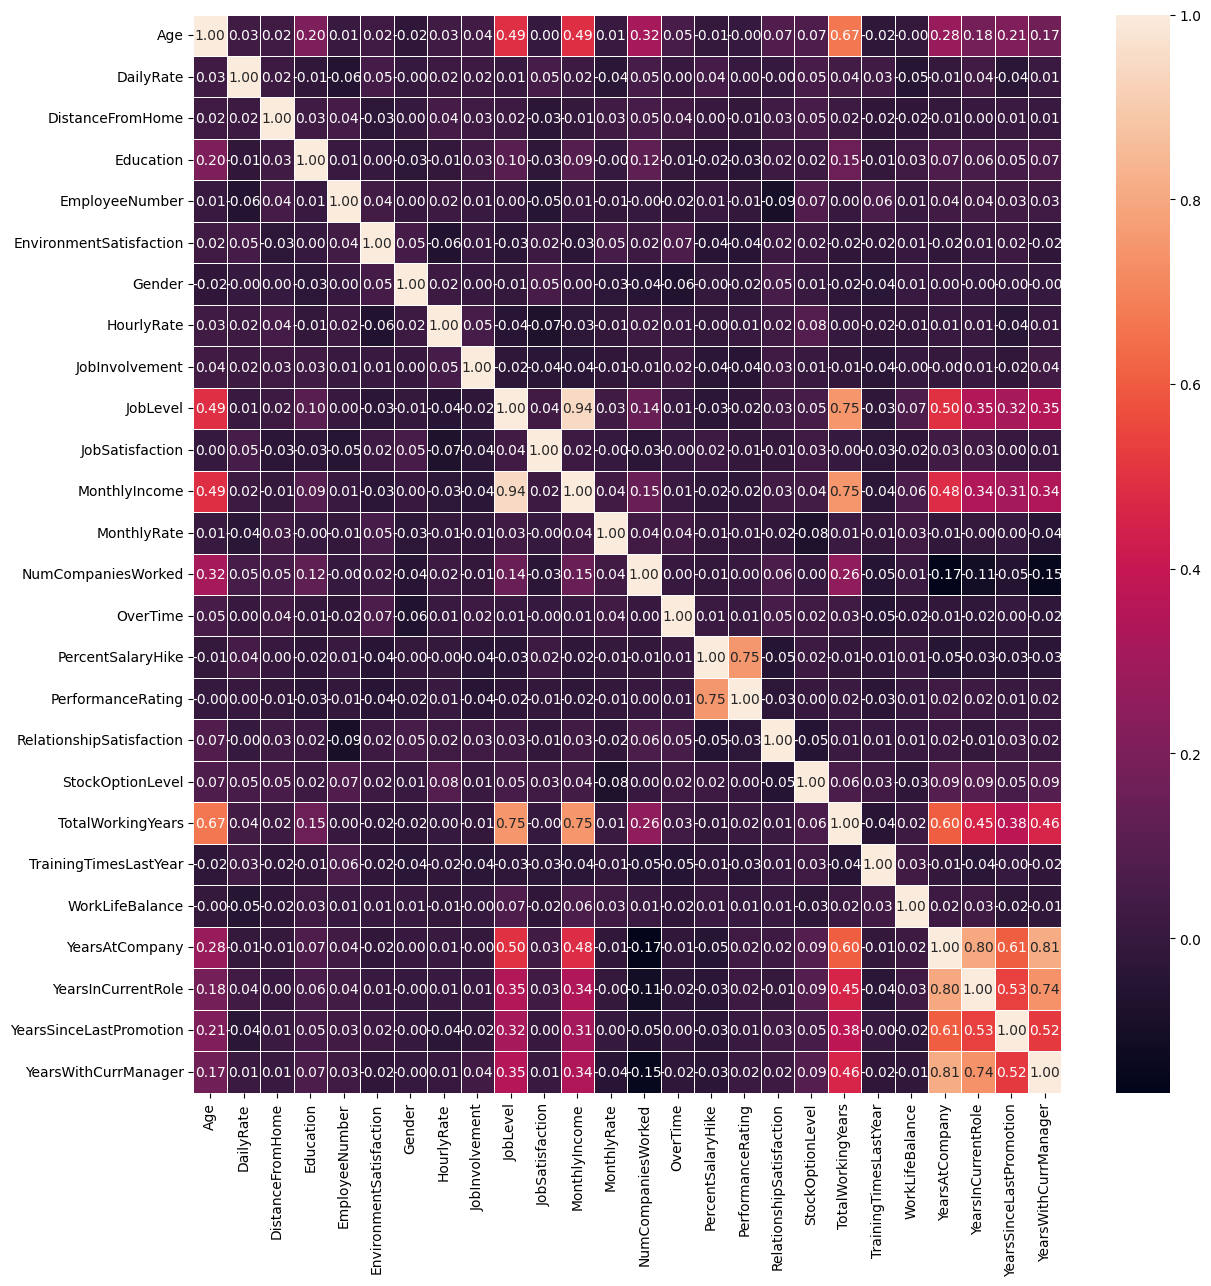

In [ ]:
df_train = pd.concat([X_trainT, y_train], axis=1)
correlation_matrix = df_train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)

CORRELACIONES POSITIVAS FUERTES :
* Age con:

   totalworkinghours - monthlyincome - joblevel
* joblevel con:

   YearsAtCompany - TotalWorkingYears - monthlyincome
* PercentSalaryHike con :

PerformanceRating

* TotalWorkinYears con:

YearsAtCompany - YearsInCurrentRole

* YearsAtCompany:
YearsWithCurrManager - YearsSinceLastPromotion - YearsInCurrentRole

CORRELACIONES NEGATIVAS FUERTES :
* Attrition con:
Age - EnvironmentSatisfaction - jobLevel - Monthlyincome - StockOptionLevel - Total WorkinaYears - YearsAtCompany - rearsinCurrentRole - YearsWithCurrManager
*NumCompaniesWorked con:
YearsWithCurrManager - YearsInCurrentRole - YearsAtCompany

In [ ]:
columns_to_encode = X_trainT.select_dtypes(include = 'object').columns
X_trainT_encoded = pd.get_dummies(X_trainT[columns_to_encode], columns=columns_to_encode, drop_first= True)
X_trainT = X_trainT.drop(columns_to_encode, axis=1)
X_trainT = pd.concat([X_trainT,X_trainT_encoded],axis=1)




In [ ]:
columns_to_encode = X_valT.select_dtypes(include = 'object').columns
X_valT_encoded = pd.get_dummies(X_valT[columns_to_encode], columns=columns_to_encode, drop_first= True)
X_valT = X_valT.drop(columns_to_encode, axis=1)
X_valT = pd.concat([X_valT,X_valT_encoded],axis=1)

In [ ]:
columns_to_encode = X_testT.select_dtypes(include = 'object').columns
X_testT_encoded = pd.get_dummies(X_testT[columns_to_encode], columns=columns_to_encode, drop_first= True)
X_testT = X_testT.drop(columns_to_encode, axis=1)
X_testT = pd.concat([X_testT,X_testT_encoded],axis=1)

In [ ]:
X_trainT.head().T

,1041,184,1222,67,220
Age,5.291503,7.280110,4.898979,6.708204,6.000000
DailyRate,29.427878,32.924155,15.491933,36.592349,37.363083
DistanceFromHome,2.236068,3.605551,4.690416,2.645751,2.236068
Education,3.000000,2.000000,1.000000,3.000000,2.000000
EmployeeNumber,38.327536,15.811388,41.400483,9.273618,17.435596
EnvironmentSatisfaction,4.000000,4.000000,4.000000,2.000000,4.000000
Gender,1.000000,0.000000,1.000000,1.000000,1.000000
HourlyRate,9.165151,7.549834,7.615773,7.681146,7.874008
JobInvolvement,3.000000,4.000000,1.000000,3.000000,3.000000
JobLevel,1.414214,1.414214,1.000000,1.732051,1.414214


In [ ]:
print(X_trainT.shape)
print(X_valT.shape)
print(X_testT.shape)

(1029, 45)
(221, 45)
(220, 45)


#PARTE 2: Análisis exploratorio entre factores



<Axes: xlabel='Age', ylabel='count'>

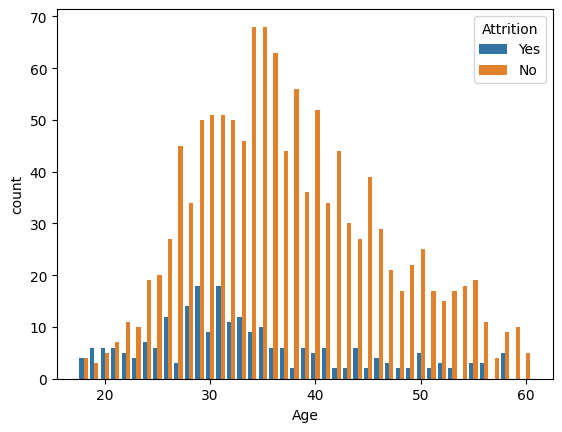

In [ ]:
sns.countplot(df1,x='Age',hue='Attrition',native_scale=True)

<Axes: xlabel='Gender', ylabel='count'>

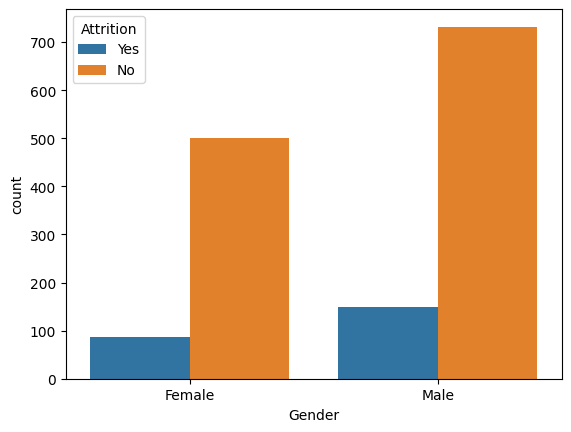

In [ ]:
sns.countplot(df1,x='Gender', hue='Attrition',native_scale=True)

<Axes: xlabel='Department', ylabel='count'>

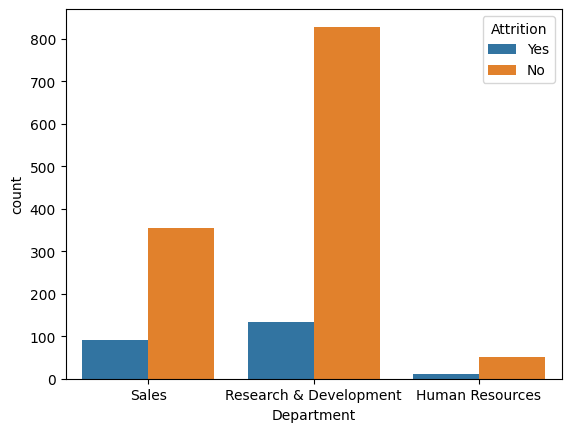

In [ ]:
sns.countplot(df1, x= 'Department', hue='Attrition',native_scale=True)

SE PUEDE INTERPRETAR QUE LAS EDADES QUE PRESENTAN MAS RENUNCIAS ES DENTRO DE LOS 30 años se observa tambien que aon mas hombres que mujeres los que deciden renunciar.
tambien los departmamentos en donde mas renuncian los empleados es en el de search and development seguido por sales.u

#PARTE 3: Modelado


CREO MI MODELO Y LE APLICO VALIDACIÓN CRUZADA PARA ASEGURAR UN MODELO QUE NO ESTE SOBREENTRENADO TAMBIEN DECIDO ESCALAR MIS VARIABLES CON STANDARD SCALER ANTES DE APLICAR MI MODELO.

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

y_trainT = np.ravel(y_trainT)
y_valT = np.ravel(y_valT)
model = make_pipeline( StandardScaler(), LogisticRegression())

cv_scores = cross_val_score(model, X_trainT, y_trainT  , cv=5)

model.fit(X_trainT, y_trainT)
train_score = model.score(X_trainT,y_trainT)
val_score = model.score(X_valT, y_valT)

print("Puntajes de Validación Cruzada:", cv_scores)
print("Accuracy del modelo en datos de validación:", val_score)
print("Accuracy del modelo en datos de Entrenamiento:", train_score)

Puntajes de Validación Cruzada: [0.83009709 0.86893204 0.88834951 0.91747573 0.87804878]
Accuracy del modelo en datos de validación: 0.8144796380090498
Accuracy del modelo en datos de Entrenamiento: 0.9076773566569485


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_train = model.predict(X_trainT)
y_pred = model.predict(X_valT)

conf_matrixtrain = confusion_matrix(y_trainT,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_trainT, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_valT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_valT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[853  15]
 [ 80  81]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       868
           1       0.84      0.50      0.63       161

    accuracy                           0.91      1029
   macro avg       0.88      0.74      0.79      1029
weighted avg       0.90      0.91      0.90      1029



Matriz de Confusión val:
[[168  13]
 [ 28  12]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       181
           1       0.48      0.30      0.37        40

    accuracy                           0.81       221
   macro avg       0.67      0.61      0.63       221
weighted avg       0.79      0.81      0.80       221



DADOS LOS PARAMETROS SE INTERPRETA QUE EL MODELO ESTA SOBREENTRENADO ESPECIALMENTE POR EL PARAMETRO POSITIVO (1) YA QUE EN EL CONJUNTO DE ENTRENAMIENTO LOS VALORES DE PRECISION Y RECALL SON ALTOS PERO ESPECIALMENTE EN ESTA CLASE BAJAN SUSTANCIALMENTE HASTA CASI LA MITAD EN EL CONJUNTO DE VALIDACIÓN, SE PUEDE DEBER A QUE LA VARIABLE NO ESTA BALANCEADA SE EVIDENCIO EN EL ANALASIS EXPLORATORIO DE DATOS QUE LA VARIABLE ATTRITION TENIA MUCHOS VALORES NEGATIVOS Y POCOS POSITIVOS EN LAS MUESTRAS DE DATOS LO CUAL EXPLICA ESTE COMPORTAMIENTO.

EL VALOR PRECISION DE LA CLASE POSITIVA BAJA CASI A LA MITAD EN EL CONJUNTO DE VALIDACION LO CUAL NOS INDICA QUE EL MODELO ESTA PREDICIENDO EN LA MITAD LAS CLASES POSITIVAS CORRECTAS DE TODAS LAS CLASES POSITIVAS QUE ARROJA EL MODELO. NO TIENE UNA BUENA PREDICCION Y PUEDE ARROJAR FALSOS POSITIVOS.

EL VALOR RECALL DE LA MISMA MANERA BAJA CASI A LA MITAD EN EL CONJUNTO DE VALIDACIÓN LO CUAL NOS INDICA QUE EL MODELO TIENE UNA MUY BAJA PREDICCION DE VALORES POSITIVOS DENTRO DE TODOS LOS VALORES REALES POSITIVOS, LO CUAL NOS INDICA QUE EL MODELO NO TIENE BUENA SENSIBILIDAD A LOS VALORES POSITIVOS Y PUEDE PRODUCIR MUCHOS FALSOS NEGATIVOS.

DENTRO DEL CONTEXTO SI LA EMPRESA BUSCA MANTENER AL PERSONAL EL PARAMETRO DE RECALL DEBERIA SER MAS ALTO CON ESTO ASEGURA QUE EL MODELO ES SENSIBLE A LA INDISPOSICION DEL EMPLEADO CON LA EMPRESA Y PODER TOMAR MEDIDAS A TIEMPO PARA RETENERLO, TAL VEZ EL PARAMETRO DE PRECISION NO ES TAN IMPORTANTE YA QUE AL DAR FALSOS POSITIVOS NO PERDERÍA EMPLEADOS CON INTENCIONES DE RENUNCIAR.

GENERANDO MODELOS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_trainT, y_trainT)

y_pred_train = knn.predict(X_trainT)

train_accuracy = knn.score(X_trainT, y_trainT)
print("Precisión en los datos de entrenamiento:", train_accuracy)

y_pred= knn.predict(X_valT)

test_accuracy = knn.score(X_valT, y_valT)
print("Precisión en los datos de prueba:", test_accuracy)

Precisión en los datos de entrenamiento: 0.8833819241982507
Precisión en los datos de prueba: 0.7873303167420814


In [ ]:
conf_matrixtrain = confusion_matrix(y_trainT,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_trainT, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_valT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_valT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[843  25]
 [ 95  66]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       868
           1       0.73      0.41      0.52       161

    accuracy                           0.88      1029
   macro avg       0.81      0.69      0.73      1029
weighted avg       0.87      0.88      0.87      1029



Matriz de Confusión val:
[[170  11]
 [ 36   4]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       181
           1       0.27      0.10      0.15        40

    accuracy                           0.79       221
   macro avg       0.55      0.52      0.51       221
weighted avg       0.72      0.79      0.75       221



TIENE VALORES SOBREENTRENADOS YA QUE EL LOS PARAMETROS PARA EL ENTRENAMIENTO SON MUY PRECISOS PERO PARA EL DE VALIDACION BAJAN SUSTANCIALMENTE EN EL PARAMETRO 1, LO CUAL SE PODRIA PENSAR EN UN SOBREENTRENAMIENTO PARA VALORES POSITIVOS, SIN EMBARGO EN VALORES NEGATIVOS FUNCIONA DE MANERA MUY PRECISA.

EL VALOR DE PRECISION DE LA CLASE POSITIVA COMO EL VALOR DE RECALL BAJAN SUSTANCIALMENTE EN LA CLASE DE VALIDACION LO QUE QUIERE DECIR QUE EL MODELO NO ES OPTMIO PARA VALORES POSITIVOS

EL VALOR DE RECALL DECAE TOTALMENTE PARA LOS VALORES POSITIVOS HASTA 0.10 LO QUE QUIERE DECIR QUE NO TIENE SENSIBILIDAD EL MODELO.

AL COMPARAR LOS DOS MODELOS SE CONCLUYE QUE EL MODELO DE REGRESIONLOGISTICA TIENE VALORES MUY BAJOS DE PRECISION Y RECALL EN LOS VALORES POSITIVOS Y BUENOS VALORES EN LOS NEGATIVOS MIENTRAS QUE EN EL MODELO KNN LOS VALORES NEGATIVOS TIENEN UN MUY BUEN MODELO PERO EN LOS VALORES POSITIVOS DECAE TOTALMENTE EL EL PRECISION Y RECALL.

#PARTE 4: Balanceo de Clases


In [ ]:
model = make_pipeline( StandardScaler(), LogisticRegression(class_weight='balanced',penalty = 'l2', solver= 'liblinear', C=1, max_iter = 4000))

cv_scores = cross_val_score(model, X_trainT, y_trainT  , cv=5)

model.fit(X_trainT, y_trainT)
train_score = model.score(X_trainT,y_trainT)
val_score = model.score(X_valT, y_valT)

print("Puntajes de Validación Cruzada:", cv_scores)
print("Accuracy del modelo en datos de validación:", val_score)
print("Accuracy del modelo en datos de Entrenamiento:", train_score)


Puntajes de Validación Cruzada: [0.77388535 0.88853503 0.87898089 0.84025559 0.80191693]
Accuracy del modelo en datos de validación: 0.7420814479638009
Accuracy del modelo en datos de Entrenamiento: 0.8571428571428571


In [ ]:
y_pred_train = model.predict(X_trainT)
y_pred = model.predict(X_valT)

conf_matrixtrain = confusion_matrix(y_trainT,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_trainT, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_valT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_valT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[667 117]
 [107 677]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       784
           1       0.85      0.86      0.86       784

    accuracy                           0.86      1568
   macro avg       0.86      0.86      0.86      1568
weighted avg       0.86      0.86      0.86      1568



Matriz de Confusión val:
[[145  36]
 [ 21  19]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       181
           1       0.35      0.47      0.40        40

    accuracy                           0.74       221
   macro avg       0.61      0.64      0.62       221
weighted avg       0.78      0.74      0.76       221



AL UTILIZAR EL PARAMETRO CLASS WEIGHT MEJORO UN POCO LA PREDICCION DE LA VARIABLE POSITIVA SIN EMBARGO DISMINUYE UN PCO EL LOS VALORES DE PRECISION Y EXACTITUD DE LA VARIABLE NEGATIVA.

UTILIZANDO SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_trainT,y_trainT = smote.fit_resample(X_trainT, y_trainT)
model = make_pipeline( StandardScaler(),LogisticRegression(class_weight='balanced',penalty = 'l2', solver= 'liblinear', C=0.5, max_iter = 4000))

cv_scores = cross_val_score(model, X_trainT, y_trainT  , cv=5)

model.fit(X_trainT, y_trainT)
train_score = model.score(X_trainT,y_trainT)
val_score = model.score(X_valT, y_valT)

print("Puntajes de Validación Cruzada:", cv_scores)
print("Accuracy del modelo en datos de validación:", val_score)
print("Accuracy del modelo en datos de Entrenamiento:", train_score)

Puntajes de Validación Cruzada: [0.77388535 0.88853503 0.88216561 0.84664537 0.80511182]
Accuracy del modelo en datos de validación: 0.7420814479638009
Accuracy del modelo en datos de Entrenamiento: 0.857780612244898


In [ ]:
y_pred_train = model.predict(X_trainT)
y_pred = model.predict(X_valT)

conf_matrixtrain = confusion_matrix(y_trainT,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_trainT, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_valT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_valT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[666 118]
 [105 679]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       784
           1       0.85      0.87      0.86       784

    accuracy                           0.86      1568
   macro avg       0.86      0.86      0.86      1568
weighted avg       0.86      0.86      0.86      1568



Matriz de Confusión val:
[[145  36]
 [ 21  19]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       181
           1       0.35      0.47      0.40        40

    accuracy                           0.74       221
   macro avg       0.61      0.64      0.62       221
weighted avg       0.78      0.74      0.76       221



APLICANDO EL MEJOR MODELO

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

smote = SMOTETomek(random_state=0)
X_trainT,y_trainT = smote.fit_resample(X_trainT, y_trainT)
model_best = make_pipeline( StandardScaler(),LogisticRegression(class_weight='balanced',penalty = 'l2', solver= 'liblinear', C=1, max_iter = 4000))

cv_scores = cross_val_score(model_best, X_trainT, y_trainT  , cv=5)

model_best.fit(X_trainT, y_trainT)
train_score = model_best.score(X_trainT,y_trainT)
val_score = model_best.score(X_valT, y_valT)

print("Puntajes de Validación Cruzada:", cv_scores)
print("Accuracy del modelo en datos de validación:", val_score)
print("Accuracy del modelo en datos de Entrenamiento:", train_score)


Puntajes de Validación Cruzada: [0.77388535 0.88853503 0.87898089 0.84025559 0.80191693]
Accuracy del modelo en datos de validación: 0.7420814479638009
Accuracy del modelo en datos de Entrenamiento: 0.8571428571428571


In [ ]:
y_pred_train = model_best.predict(X_trainT)
y_pred = model_best.predict(X_valT)

conf_matrixtrain = confusion_matrix(y_trainT,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_trainT, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_valT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_valT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[667 117]
 [107 677]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       784
           1       0.85      0.86      0.86       784

    accuracy                           0.86      1568
   macro avg       0.86      0.86      0.86      1568
weighted avg       0.86      0.86      0.86      1568



Matriz de Confusión val:
[[145  36]
 [ 21  19]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       181
           1       0.35      0.47      0.40        40

    accuracy                           0.74       221
   macro avg       0.61      0.64      0.62       221
weighted avg       0.78      0.74      0.76       221



#PARTE 5: Importancia de los factores


In [ ]:
coefficients = model_best.named_steps['logisticregression'].coef_[0]
coef_df = pd.DataFrame({'Feature': X_trainT.columns, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
top_features = coef_df.head(10)
print("Los 10 factores más importantes para la rotación de personal son:")
print(top_features)

Los 10 factores más importantes para la rotación de personal son:
                      Feature  Coefficient  Abs_Coefficient
9                    JobLevel    -1.382026         1.382026
25       YearsWithCurrManager    -0.973722         0.973722
14                   OverTime     0.872990         0.872990
39  JobRole_Research Director    -0.861795         0.861795
24    YearsSinceLastPromotion     0.688059         0.688059
22             YearsAtCompany     0.683497         0.683497
5     EnvironmentSatisfaction    -0.566096         0.566096
37            JobRole_Manager    -0.564804         0.564804
10            JobSatisfaction    -0.526034         0.526034
8              JobInvolvement    -0.510795         0.510795


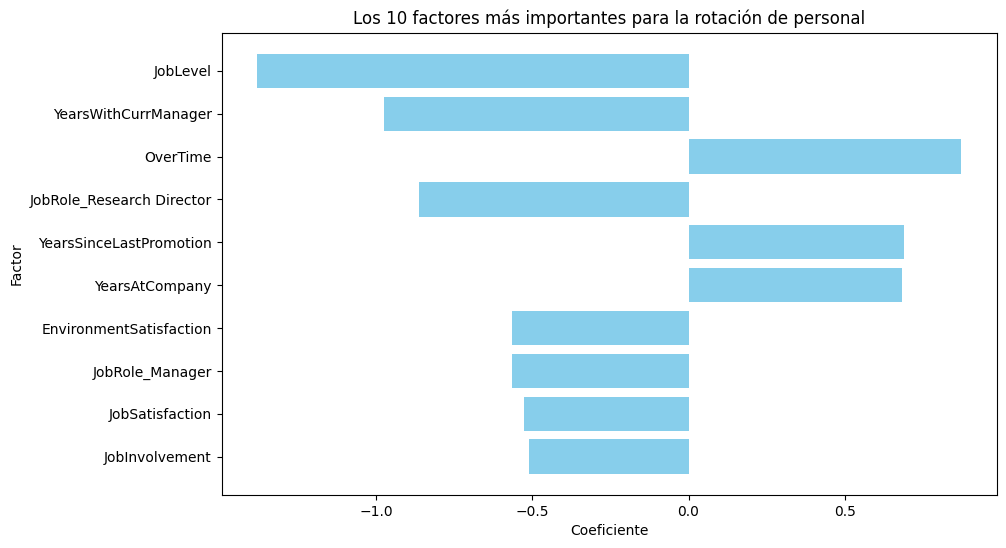

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Factor')
plt.title('Los 10 factores más importantes para la rotación de personal')
plt.gca().invert_yaxis()
plt.show()

LOS FACTORES QUE MAS INFLUYEN EN QUE UN EMPLEADO ABANDONE SU TRABAJO SON OVERTIME, YEARSSINCELASTPROMOTION Y YEARSATCOMPANY

LOS FACTORES QUE MAS INFLUYEN EN QUE UN EMPLEADO NO ABANDONE SU TRABAJO SON  JOBLEVEL, YEARSWITHCURRENTMANAGER, JOBROLE_RESEARCH DIRECTOR, ENVIONMENTSATISFACTION, JOBROLE_MANAGER

MEJORES FACTORES

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_best, X_valT, y_valT, scoring='f1_weighted', n_repeats=10, random_state=42)
importance = result.importances_mean
feature_names = X_trainT.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Los factores más importantes para la rotación de personal son:")
print(importance_df.head(10))


Los factores más importantes para la rotación de personal son:
                         Feature  Importance
25          YearsWithCurrManager    0.023941
13            NumCompaniesWorked    0.022794
23            YearsInCurrentRole    0.022699
24       YearsSinceLastPromotion    0.020683
17      RelationshipSatisfaction    0.016640
30  EducationField_Life Sciences    0.016113
9                       JobLevel    0.015253
22                YearsAtCompany    0.014948
8                 JobInvolvement    0.014642
40    JobRole_Research Scientist    0.013228


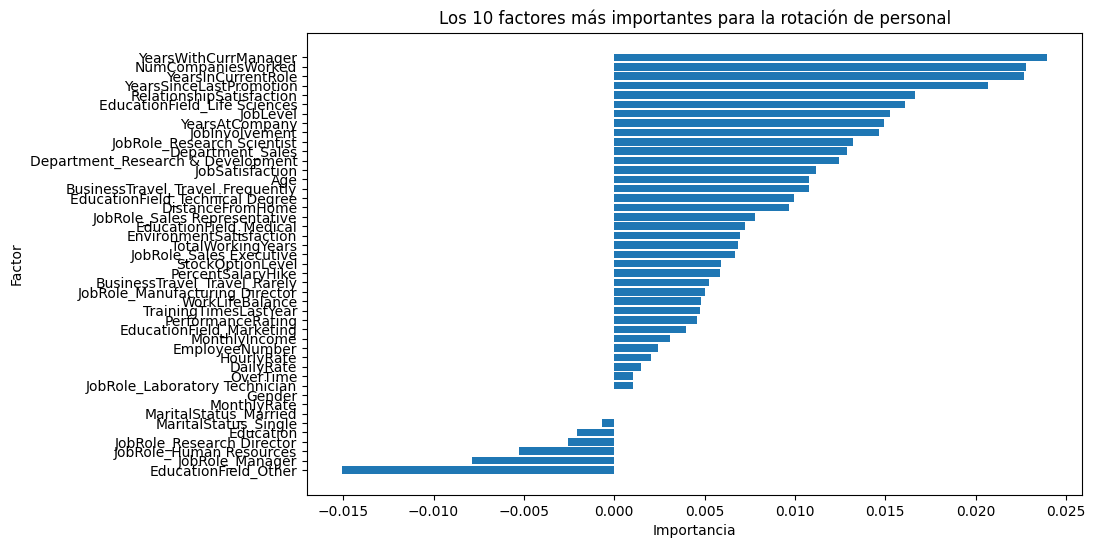

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Factor')
plt.title('Los 10 factores más importantes para la rotación de personal')
plt.gca().invert_yaxis()
plt.show()

Los factores que mas contribuyen a que abandone su trabajo son
YEARSWITH CURR MANAGER, NUMCOMPANIESWORKED, YEARSINCURRENTROLE, YEARSSINCELASTPROMOTION, RELATIONSHIPSATISFACTION

los factores que contribuyen a que no abandone su trabajo son
EDUCATIONFIELD,JOBROLEMANAGER, JOBROLAHUMANRESOURCES

DE LOS DOS METODOS ME PARECE QUE EL DE IMPORTANCIA SE ACERCA MAS A LOS FACTORES QUE REALMENTE APORTAN SIGNIFICATIVAMENTE A QUE LAS PERSONAS RENUNCIEN O NO RENUNCIEN A SU EMPLEO

REDUCIR FACTORES PARA UN MEJOR MODELO

In [ ]:
from sklearn.feature_selection import SelectFromModel

model_best.fit(X_trainT, y_trainT)
estimator_final = model_best.named_steps['logisticregression']
sfm = SelectFromModel(estimator_final, threshold='median')
sfm.fit(X_trainT, y_trainT)
X_train_selected = sfm.transform(X_trainT)
X_val_selected = sfm.transform(X_valT)

best_model_selected = model_best
best_model_selected.fit(X_train_selected, y_trainT)
train_score = best_model_selected.score(X_train_selected,y_trainT)
val_score = best_model_selected.score(X_val_selected, y_valT)

print("Puntajes de Validación Cruzada:", cv_scores)
print("Accuracy del modelo en datos de validación:", val_score)
print("Accuracy del modelo en datos de Entrenamiento:", train_score)

Puntajes de Validación Cruzada: [0.77388535 0.88853503 0.87898089 0.84025559 0.80191693]
Accuracy del modelo en datos de validación: 0.7692307692307693
Accuracy del modelo en datos de Entrenamiento: 0.8258928571428571


In [ ]:
num_factores_inicial = X_trainT.shape[1]

num_factores_reducidos = X_train_selected.shape[1]
porcentaje_reduccion_factores = ((num_factores_inicial - num_factores_reducidos) / num_factores_inicial) * 100

print("Número inicial de factores:", num_factores_inicial)
print("Número de factores después de la reducción:", num_factores_reducidos)
print("Porcentaje de reducción de factores:", porcentaje_reduccion_factores, "%")

Número inicial de factores: 45
Número de factores después de la reducción: 23
Porcentaje de reducción de factores: 48.888888888888886 %


In [ ]:
y_pred_train = best_model_selected.predict(X_train_selected)
y_pred = best_model_selected.predict(X_val_selected)

conf_matrixtrain = confusion_matrix(y_trainT,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_trainT, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_valT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_valT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[642 142]
 [131 653]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       784
           1       0.82      0.83      0.83       784

    accuracy                           0.83      1568
   macro avg       0.83      0.83      0.83      1568
weighted avg       0.83      0.83      0.83      1568



Matriz de Confusión val:
[[149  32]
 [ 19  21]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       181
           1       0.40      0.53      0.45        40

    accuracy                           0.77       221
   macro avg       0.64      0.67      0.65       221
weighted avg       0.80      0.77      0.78       221



#PARTE 6: Modelo final y conclusiones



In [ ]:
X_train_final = np.vstack((X_train_selected, X_val_selected))
y_train_final = np.hstack((y_trainT, y_valT))

X_test_selected = sfm.transform(X_testT)
v_scores = cross_val_score(best_model_selected, X_train_final, y_train_final, cv=5)

best_model_selected.fit(X_train_final, y_train_final)
train_score = best_model_selected.score(X_train_final, y_train_final)
train_score_test = best_model_selected.score(X_test_selected, y_testT)
print("Puntajes de Validación Cruzada:", v_scores)
print("Accuracy del modelo en datos de Entrenamiento:", train_score)
print("Accuracy del modelo en datos de prueba:", train_score_test)


Puntajes de Validación Cruzada: [0.7849162  0.87709497 0.80446927 0.75418994 0.80112045]
Accuracy del modelo en datos de Entrenamiento: 0.820570150922303
Accuracy del modelo en datos de prueba: 0.7954545454545454


ES EL MEJOR MODELO YA QUE NOS DA PRECISION Y ACCURACY UN POCO MEJOR QUE EL RESTO DE MODELOS LO CUAL NOS PERMITE UNA MAYOR CONFIANZA EN LA VARIABLE POSITIVA

In [ ]:
y_pred_train = best_model_selected.predict(X_train_final)
y_pred = best_model_selected.predict(X_test_selected)

conf_matrixtrain = confusion_matrix(y_train_final,y_pred_train )
print("Matriz de Confusión train:")
print(conf_matrixtrain)


class_reporttrain = classification_report(y_train_final, y_pred_train)
print("\nInforme de Clasificación train:")
print(class_reporttrain)

conf_matrix = confusion_matrix(y_testT,y_pred )
print("\n\nMatriz de Confusión val:")
print(conf_matrix)


class_report = classification_report(y_testT, y_pred)
print("\nInforme de Clasificación val:")
print(class_report)

Matriz de Confusión train:
[[793 172]
 [149 675]]

Informe de Clasificación train:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       965
           1       0.80      0.82      0.81       824

    accuracy                           0.82      1789
   macro avg       0.82      0.82      0.82      1789
weighted avg       0.82      0.82      0.82      1789



Matriz de Confusión val:
[[149  35]
 [ 10  26]]

Informe de Clasificación val:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       184
           1       0.43      0.72      0.54        36

    accuracy                           0.80       220
   macro avg       0.68      0.77      0.70       220
weighted avg       0.85      0.80      0.81       220



DADOS LOS RESULTADOS EL MODELO SE ENFOCO A AUMENTAR EL RECALL DE LOS PARAMETROS LO CUAL EVITARA LA FUGA DE TALENTO DENTRO DE LA EMPRESA YA QUE EL MODELO TIENE UNA BUENA SENSIBILIDAD PARA PREDECIR LOS EMPLEADOS QUE PUEDEN SER PROPENSOS A IRSE DE LA EMPRESA, VEMOS QUE EN LA PRECISION TENEMOS UN RANGO BAJO EN LOS POSITIVOS, SIN EMBARO EL MODELO FUE ENFOCADO A LA SENSIBILIDAD PARA EVITAR PERDIDA DE TALENTO CON UN F1 SCORE  SE PUEDE INTERPRETAR QUE EN PROMEDIO EL MODELO PUEDE PREDCIR DE MANERA ACERTADA TANTO CASOS POSITIVOS COMO NEGATIVOS CON UNA GARANTIA DE 81%.